<a href="https://colab.research.google.com/github/youngseo21/esaa_22/blob/main/%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_kp2020%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기
+ 대전·세종·충남 지역 교통사고 및 보이스피싱 112신고 데이터를 활용한 분석 아이디어 제시, 예측 알고리즘 개발 등 자유 방식
+ 신종·지능형 범죄 급증 등 급변하는 치안 환경에 발맞춰 치안 데이터를 활용하여
한정된 경찰력을 선택과 집중에 따라 운영하고
선제적 대응 및 시대적 여건에 부응하는 맞춤형 치안 서비스 제공을 위해

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

kp2020 = pd.read_csv("/content/drive/MyDrive/esaa_data/지역 치안 안전 데이터 분석/KP2020.csv", encoding='cp949')
kp2021 = pd.read_csv("/content/drive/MyDrive/esaa_data/지역 치안 안전 데이터 분석/KP2021.csv", encoding='cp949')
npa2020 = pd.read_csv('/content/drive/MyDrive/esaa_data/지역 치안 안전 데이터 분석/NPA2020.csv', encoding='cp949')

# 2. 데이터 파악
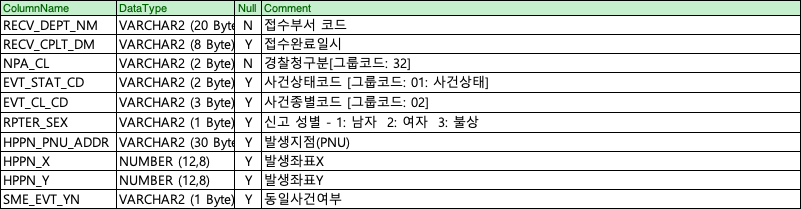

In [ ]:
kp2020.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN


In [ ]:
kp2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77077 entries, 0 to 77076
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECV_DEPT_NM   77077 non-null  object 
 1   RECV_CPLT_DM   77077 non-null  object 
 2   NPA_CL         77077 non-null  int64  
 3   EVT_STAT_CD    77077 non-null  int64  
 4   EVT_CL_CD      77077 non-null  int64  
 5   RPTER_SEX      74658 non-null  float64
 6   HPPN_PNU_ADDR  47805 non-null  object 
 7   HPPN_X         60313 non-null  float64
 8   HPPN_Y         60313 non-null  float64
 9   SME_EVT_YN     13442 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.9+ MB


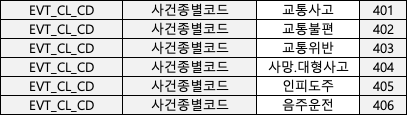

In [ ]:
kp2020['EVT_CL_CD'].value_counts().sort_index()

104     1117
105        8
106       74
107     1121
108      110
109       33
201     1845
202      400
204       41
205      420
206      384
207       67
208      334
209      149
210     1554
211      286
212       26
213       27
214       13
215     1660
301     2578
302     2098
303      286
304      327
305      984
306      893
307     6437
308      212
401     6207
402     1294
403      516
405        1
406     1325
501    16336
502      179
503      637
504       18
505      250
506      573
507       57
508      438
509      484
601    21967
602      172
603       81
604     1315
606      979
607       69
609      649
610       46
Name: EVT_CL_CD, dtype: int64

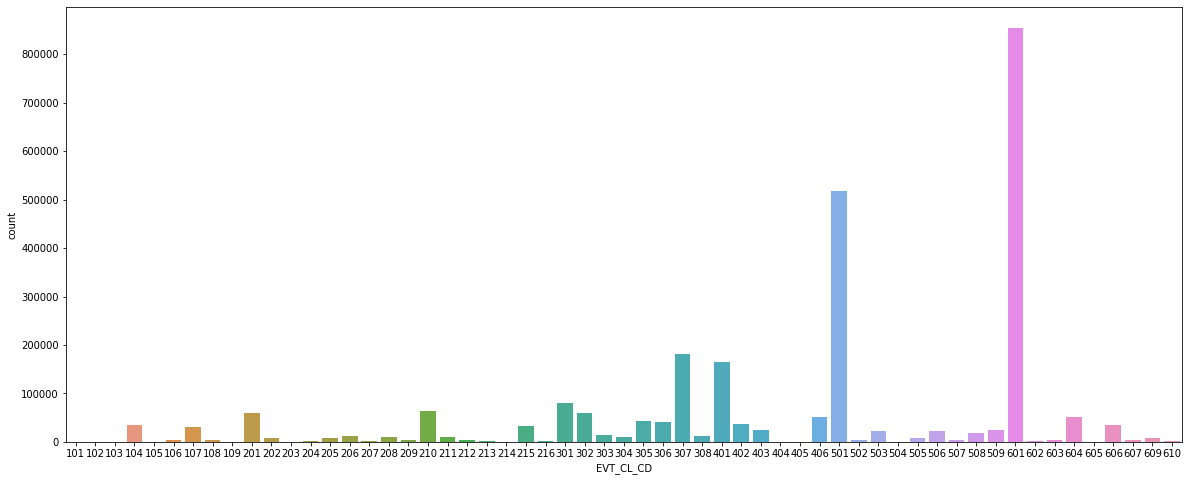

In [ ]:
fig = plt.figure(figsize=(20, 8))
sns.countplot(data=kp2021.sort_values(by='EVT_CL_CD'),x='EVT_CL_CD')

In [ ]:
# kp2020에는 코드 404 사망/대형사고 건이 없음
kp2020_car = kp2020[(kp2020['EVT_CL_CD']==401) | (kp2020['EVT_CL_CD']==404)]
kp2020_car.EVT_CL_CD.value_counts()

401    6207
Name: EVT_CL_CD, dtype: int64

In [ ]:
kp2020_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6207 entries, 4 to 77069
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECV_DEPT_NM   6207 non-null   object 
 1   RECV_CPLT_DM   6207 non-null   object 
 2   NPA_CL         6207 non-null   int64  
 3   EVT_STAT_CD    6207 non-null   int64  
 4   EVT_CL_CD      6207 non-null   int64  
 5   RPTER_SEX      6207 non-null   float64
 6   HPPN_PNU_ADDR  6013 non-null   object 
 7   HPPN_X         6116 non-null   float64
 8   HPPN_Y         6116 non-null   float64
 9   SME_EVT_YN     1282 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 533.4+ KB


# 3. 전처리
+ `RPTER_SEX`의 경우 1: 남성, 2: 여성, 3: 불상 -> null 값들 3: 불상으로 대체 -> kp2020은 안해도 됨
+ `HPPN_PNU_ADDR`의 null 값의 경우 `HPPN_X` `HPPN_Y` 사건 발생 좌표가 있는 경우 위도, 경도 좌표를 통해 주소 얻기 

In [ ]:
# HPPN_PNU_ADDR 널값 처리
from geopy.geocoders import Nominatim

def geocoding_reverse(lat_lng_str): 
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    address = geolocoder.reverse(lat_lng_str)
    return address

address = geocoding_reverse('36.773610, 126.933244')
print(address)

GS25, 순천향로, 읍내리, 아산시, 충청남도, 31537, 대한민국


In [ ]:
XY_exist = kp2020_car[kp2020_car['HPPN_X'].notna() & kp2020_car['HPPN_PNU_ADDR'].isna()].reset_index().drop(columns = 'index') # 좌표값은 있고 주소는 없는 데이터

In [ ]:
XY_exist.isna().sum()

RECV_DEPT_NM       0
RECV_CPLT_DM       0
NPA_CL             0
EVT_STAT_CD        0
EVT_CL_CD          0
RPTER_SEX          0
HPPN_PNU_ADDR    167
HPPN_X             0
HPPN_Y             0
SME_EVT_YN       163
dtype: int64

In [ ]:
lat_lng = []
for i in XY_exist.index:
  x = XY_exist.iloc[i].HPPN_X
  y = XY_exist.iloc[i].HPPN_Y
  lat_lng_str = "{}, {}".format(y,x)
  lat_lng.append(lat_lng_str)
XY_exist['HPPN_XY'] = lat_lng

In [ ]:
XY_exist.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,HPPN_XY
0,대전청,20/12/01 14:28:47.000000000,13,10,401,2.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276"
1,대전청,20/12/01 14:45:13.000000000,13,10,401,1.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276"
2,대전청,20/12/01 14:24:06.000000000,13,10,401,2.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276"
3,대전청,20/12/01 17:18:26.000000000,13,10,401,1.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276"
4,대전청,20/12/01 17:30:42.000000000,13,10,401,1.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276"


In [ ]:
XY_exist['loc'] = XY_exist.apply(lambda x: geocoding_reverse(x['HPPN_XY']), axis=1)

In [ ]:
XY_exist

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,HPPN_XY,loc
0,대전청,20/12/01 14:28:47.000000000,13,10,401,2.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276","(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
1,대전청,20/12/01 14:45:13.000000000,13,10,401,1.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276","(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
2,대전청,20/12/01 14:24:06.000000000,13,10,401,2.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276","(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
3,대전청,20/12/01 17:18:26.000000000,13,10,401,1.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276","(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
4,대전청,20/12/01 17:30:42.000000000,13,10,401,1.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276","(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
...,...,...,...,...,...,...,...,...,...,...,...,...
162,대전청,20/12/31 21:38:37.000000000,13,10,401,1.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276","(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
163,대전청,20/12/31 22:15:35.000000000,13,10,401,1.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276","(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
164,대전청,20/12/31 22:48:12.000000000,13,10,401,1.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276","(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
165,대전청,20/12/30 16:50:15.000000000,13,10,401,1.0,NaN,127.404663,36.341685,NaN,"36.34168467, 127.40466276","(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."


In [ ]:
XY_exist.drop(columns='HPPN_PNU_ADDR', inplace=True)
XY_exist.rename({'loc':'HPPN_PNU_ADDR'}, axis=1, inplace=True)

In [ ]:
XY_null = kp2020_car[kp2020_car['HPPN_X'].isna() | kp2020_car['HPPN_PNU_ADDR'].notna()]
XY_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 4 to 77069
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECV_DEPT_NM   6040 non-null   object 
 1   RECV_CPLT_DM   6040 non-null   object 
 2   NPA_CL         6040 non-null   int64  
 3   EVT_STAT_CD    6040 non-null   int64  
 4   EVT_CL_CD      6040 non-null   int64  
 5   RPTER_SEX      6040 non-null   float64
 6   HPPN_PNU_ADDR  6013 non-null   object 
 7   HPPN_X         5949 non-null   float64
 8   HPPN_Y         5949 non-null   float64
 9   SME_EVT_YN     1278 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 519.1+ KB


+ `HPPN_PNU_ADDR`, `HPPN_X` 둘다 널값인 줄 삭제

In [ ]:
XY_null[XY_null['HPPN_PNU_ADDR'].isna() & XY_null['HPPN_X'].isna()]

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
17064,충남청,20/12/09 23:30:20.000000000,19,10,401,1.0,NaN,NaN,NaN,NaN
17132,충남청,20/12/09 21:20:10.000000000,19,10,401,2.0,NaN,NaN,NaN,NaN
18399,충남청,20/12/10 12:29:38.000000000,19,10,401,3.0,NaN,NaN,NaN,NaN
22269,충남청,20/12/09 14:59:07.000000000,19,10,401,1.0,NaN,NaN,NaN,NaN
29455,충남청,20/12/14 16:00:09.000000000,19,10,401,2.0,NaN,NaN,NaN,NaN
30710,충남청,20/12/14 17:31:26.000000000,19,10,401,1.0,NaN,NaN,NaN,NaN
32015,충남청,20/12/15 11:37:55.000000000,19,10,401,1.0,NaN,NaN,NaN,NaN
32065,충남청,20/12/15 12:06:29.000000000,19,10,401,1.0,NaN,NaN,NaN,NaN
32772,충남청,20/12/15 18:31:06.000000000,19,10,401,1.0,NaN,NaN,NaN,NaN
37675,충남청,20/12/17 17:16:36.000000000,19,10,401,1.0,NaN,NaN,NaN,NaN


In [ ]:
XY_null = XY_null[XY_null['HPPN_PNU_ADDR'].notna() | XY_null['HPPN_X'].notna()]
XY_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6004 entries, 4 to 77069
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECV_DEPT_NM   6004 non-null   object 
 1   RECV_CPLT_DM   6004 non-null   object 
 2   NPA_CL         6004 non-null   int64  
 3   EVT_STAT_CD    6004 non-null   int64  
 4   EVT_CL_CD      6004 non-null   int64  
 5   RPTER_SEX      6004 non-null   float64
 6   HPPN_PNU_ADDR  6004 non-null   object 
 7   HPPN_X         5949 non-null   float64
 8   HPPN_Y         5949 non-null   float64
 9   SME_EVT_YN     1276 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 516.0+ KB


In [ ]:
XY_null[XY_null['HPPN_X'].isna()].head(10)

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
1265,2지구대(충남),20/12/01 07:11:05.000000000,19,10,401,1.0,목포방향,NaN,NaN,NaN
1406,2지구대(충남),20/12/01 18:55:49.000000000,19,10,401,1.0,논산방향,NaN,NaN,NaN
2289,충남청,20/12/04 00:59:41.000000000,19,10,401,2.0,충청남도 천안시 서북구 두정동(부성2동) 955,NaN,NaN,NaN
2449,2지구대(충남),20/12/02 13:19:50.000000000,19,10,401,1.0,경부선 서울방향 천안IC 1Km 전 지점,NaN,NaN,NaN
2538,충남청,20/12/02 17:06:33.000000000,19,10,401,3.0,충청남도 천안시 서북구 불당동(행정:불당동) 234-1,NaN,NaN,NaN
2574,2지구대(충남),20/12/02 13:49:23.000000000,19,10,401,1.0,천안논산고속도로 정안(상)휴게소,NaN,NaN,NaN
2764,2지구대(충남),20/12/02 18:02:33.000000000,19,10,401,1.0,목포방향,NaN,NaN,NaN
2923,2지구대(충남),20/12/02 17:46:47.000000000,19,10,401,1.0,논산방향,NaN,NaN,NaN
3050,충남청,20/12/02 21:58:33.000000000,19,10,401,1.0,충청남도 태안군 태안읍 남문리(행정:태안읍) 720-9,NaN,NaN,NaN
3604,충남청,20/12/02 11:39:55.000000000,19,10,401,2.0,충청남도 천안시 동남구 목천읍 신계리(행정:목천읍) 422,NaN,NaN,NaN


+ `HPPN_PNU_ADDR`에 . 점으로 표시된 줄 삭제

In [ ]:
XY_null = XY_null[XY_null['HPPN_PNU_ADDR']!='.']
XY_null[XY_null['HPPN_X'].isna()]

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
1265,2지구대(충남),20/12/01 07:11:05.000000000,19,10,401,1.0,목포방향,NaN,NaN,NaN
1406,2지구대(충남),20/12/01 18:55:49.000000000,19,10,401,1.0,논산방향,NaN,NaN,NaN
2289,충남청,20/12/04 00:59:41.000000000,19,10,401,2.0,충청남도 천안시 서북구 두정동(부성2동) 955,NaN,NaN,NaN
2449,2지구대(충남),20/12/02 13:19:50.000000000,19,10,401,1.0,경부선 서울방향 천안IC 1Km 전 지점,NaN,NaN,NaN
2538,충남청,20/12/02 17:06:33.000000000,19,10,401,3.0,충청남도 천안시 서북구 불당동(행정:불당동) 234-1,NaN,NaN,NaN
2574,2지구대(충남),20/12/02 13:49:23.000000000,19,10,401,1.0,천안논산고속도로 정안(상)휴게소,NaN,NaN,NaN
2764,2지구대(충남),20/12/02 18:02:33.000000000,19,10,401,1.0,목포방향,NaN,NaN,NaN
2923,2지구대(충남),20/12/02 17:46:47.000000000,19,10,401,1.0,논산방향,NaN,NaN,NaN
3050,충남청,20/12/02 21:58:33.000000000,19,10,401,1.0,충청남도 태안군 태안읍 남문리(행정:태안읍) 720-9,NaN,NaN,NaN
3604,충남청,20/12/02 11:39:55.000000000,19,10,401,2.0,충청남도 천안시 동남구 목천읍 신계리(행정:목천읍) 422,NaN,NaN,NaN


+ 주소만 있는 데이터는 일단 보류
+ 같은 좌표 주소의 데이터에서 address 널값 발생한 거였음...

+ 주소에서 광역시도(`state`), 시군(`city`), 동읍면리(`town`) 추출

In [ ]:
XY_null.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
9,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN
10,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN
31,충남청,20/12/01 01:36:38.000000000,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,NaN
53,대전청,20/12/01 01:39:03.000000000,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,NaN


In [ ]:
XY_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6004 entries, 4 to 77069
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECV_DEPT_NM   6004 non-null   object 
 1   RECV_CPLT_DM   6004 non-null   object 
 2   NPA_CL         6004 non-null   int64  
 3   EVT_STAT_CD    6004 non-null   int64  
 4   EVT_CL_CD      6004 non-null   int64  
 5   RPTER_SEX      6004 non-null   float64
 6   HPPN_PNU_ADDR  6004 non-null   object 
 7   HPPN_X         5949 non-null   float64
 8   HPPN_Y         5949 non-null   float64
 9   SME_EVT_YN     1276 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 516.0+ KB


In [ ]:
def state(add):
  if '대전' in add:
    return '대전'
  elif '충청남도' in add:
    return '충남'
  elif '세종' in add:
    return '세종'
  elif '충청북도' in add:
    return '충북'
  elif '경기도' in add: # 추후 삭제
    return '경기도'
  elif '인천' in add:
    return '인천'
  elif '서울' in add:
    return '서울'
  elif '대구' in add:
    return '대구'
  elif '전라' in add:
    return '전라'
  elif '경상' in add:
    return '경상'


XY_null['state'] = XY_null.apply(lambda x: state(x['HPPN_PNU_ADDR']), axis=1)
XY_null.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN,충남
9,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN,대전
10,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN,대전
31,충남청,20/12/01 01:36:38.000000000,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,NaN,충남
53,대전청,20/12/01 01:39:03.000000000,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,NaN,대전


In [ ]:
XY_null[XY_null['state'].isna()]

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state
1265,2지구대(충남),20/12/01 07:11:05.000000000,19,10,401,1.0,목포방향,NaN,NaN,NaN,None
1406,2지구대(충남),20/12/01 18:55:49.000000000,19,10,401,1.0,논산방향,NaN,NaN,NaN,None
2574,2지구대(충남),20/12/02 13:49:23.000000000,19,10,401,1.0,천안논산고속도로 정안(상)휴게소,NaN,NaN,NaN,None
2764,2지구대(충남),20/12/02 18:02:33.000000000,19,10,401,1.0,목포방향,NaN,NaN,NaN,None
2923,2지구대(충남),20/12/02 17:46:47.000000000,19,10,401,1.0,논산방향,NaN,NaN,NaN,None
3747,2지구대(충남),20/12/02 14:06:51.000000000,19,10,401,1.0,천논선 천안방향 정안휴게소 내,NaN,NaN,NaN,None
4383,2지구대(충남),20/12/03 14:47:53.000000000,19,10,401,2.0,호남지선 논산방향 52km,NaN,NaN,NaN,None
4843,2지구대(충남),20/12/03 18:27:10.000000000,19,10,401,1.0,회덕방향,NaN,NaN,NaN,None
6231,2지구대(충남),20/12/06 00:33:24.000000000,19,10,401,1.0,목포방향,NaN,NaN,NaN,None
6835,2지구대(충남),20/12/04 21:12:05.000000000,19,10,401,1.0,천논선 천안방향 차령터널 지나서,NaN,NaN,NaN,None


In [ ]:
# 충남, 세종, 대전 외 state 전부 삭제
# state 없는 고속도로 및 휴게소 교통사고도 해당 state와는 관련 없음으로 처리
XY_null = XY_null[(XY_null['state']=='충남') | (XY_null['state']=='세종') | (XY_null['state']=='대전')]
XY_null.state.value_counts()

충남    3129
대전    2468
세종     313
Name: state, dtype: int64

In [ ]:
XY_null

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN,충남
9,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN,대전
10,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN,대전
31,충남청,20/12/01 01:36:38.000000000,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,NaN,충남
53,대전청,20/12/01 01:39:03.000000000,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,NaN,대전
...,...,...,...,...,...,...,...,...,...,...,...
76995,충남청,20/12/31 00:33:54.000000000,19,10,401,1.0,충청남도 서산시 온석동(동문1동) 354-2,126.471991,36.801294,Y,충남
76998,충남청,20/12/31 00:34:45.000000000,19,10,401,1.0,충청남도 서산시 온석동(동문1동) 393-3,126.471756,36.801603,Y,충남
77036,대전청,20/12/31 01:08:43.000000000,13,10,401,1.0,대전광역시 중구 대흥동(행정:대흥동),127.428343,36.324386,NaN,대전
77068,대전청,20/12/31 01:17:01.000000000,13,10,401,1.0,대전광역시 서구 도마동(행정:도마2동) 549-1,127.369099,36.312971,NaN,대전


+ 시군구 추출

In [ ]:
asdf = [1,2,3]
len(asdf)

3

In [ ]:
def city(add):
  splitted = add.split()
  if len(splitted) > 1:
    if '세종' in splitted[0]: 
      return '세종시'
    elif '충청' in splitted[1]:
      return splitted[2]
    else:
      return splitted[1]
  else:
    return "unknown"

XY_null['city'] = XY_null.apply(lambda x: city(x['HPPN_PNU_ADDR']), axis=1)
XY_null.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN,충남,천안시
9,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN,대전,중구
10,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN,대전,중구
31,충남청,20/12/01 01:36:38.000000000,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,NaN,충남,서산시
53,대전청,20/12/01 01:39:03.000000000,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,NaN,대전,동구


In [ ]:
XY_null.city.value_counts()

천안시        961
서구         835
유성구        520
아산시        492
동구         370
중구         367
대덕구        363
세종시        313
서산시        269
당진시        256
논산시        201
보령시        196
공주시        196
홍성군        157
예산군         97
금산군         72
태안군         67
부여군         63
서천군         58
청양군         24
계룡시         21
담양군          8
unknown      3
Name: city, dtype: int64

In [ ]:
XY_null[XY_null.city=='통영방향'] # 해당 열 삭제

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city
12351,2지구대(충남),20/12/06 18:00:54.000000000,19,10,401,1.0,대전통영선 통영방향 남대전톨게이트 빠지는 램프구간,NaN,NaN,NaN,대전,통영방향


In [ ]:
XY_null.drop(12351, inplace=True)

In [ ]:
XY_null[XY_null.city=='unknown'] # 해당 열 삭제

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city
6469,2지구대(충남),20/12/06 01:06:14.000000000,19,10,401,1.0,대전방향,NaN,NaN,NaN,대전,unknown
10092,2지구대(충남),20/12/04 09:09:44.000000000,19,10,401,1.0,대전방향,NaN,NaN,NaN,대전,unknown
10709,2지구대(충남),20/12/08 12:51:08.000000000,19,10,401,1.0,대전방향,NaN,NaN,NaN,대전,unknown


In [ ]:
XY_null.drop([6469, 10092, 10709], inplace=True)
XY_null.city.value_counts()

천안시    961
서구     835
유성구    520
아산시    492
동구     370
중구     367
대덕구    363
세종시    313
서산시    269
당진시    256
논산시    201
보령시    196
공주시    196
홍성군    157
예산군     97
금산군     72
태안군     67
부여군     63
서천군     58
청양군     24
계룡시     21
담양군      8
Name: city, dtype: int64

In [ ]:
def town(add):
  splitted = add.split()
  if len(splitted) > 1:
    if '세종' in splitted[0]: 
      if '세종' in splitted[1]:
        return splitted[2]
      else:
        return splitted[1]
    elif '충청' in splitted[0]:
      if '천안시' in splitted[1]:
        return splitted [3]
      else:
        return splitted[2]
    elif '충청' in splitted[1]:
      return splitted[3]
    else:
      return splitted[2]
  else:
    return "unknown"

XY_null['town'] = XY_null.apply(lambda x: town(x['HPPN_PNU_ADDR']), axis=1)
XY_null.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city,town,town2
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN,충남,천안시,성정동(행정:성정2동),서북구
9,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN,대전,중구,석교동(석교동),석교동
10,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN,대전,중구,석교동(행정:석교동),석교동
31,충남청,20/12/01 01:36:38.000000000,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,NaN,충남,서산시,대산읍,대산읍
53,대전청,20/12/01 01:39:03.000000000,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,NaN,대전,동구,대동(행정:대동),대동


In [ ]:
XY_null.town.value_counts()

홍성읍             85
배방읍             77
둔산동(행정:둔산2동)    67
탄방동(행정:탄방동)     57
둔산동(둔산2동)       55
                ..
괴곡동(행정:가수원동)     1
관촉동(취암동)         1
봉황동(중학동)         1
동문동              1
유량동(원성1동)        1
Name: town, Length: 717, dtype: int64

In [ ]:
import re

def bracket(town):
  result = re.sub(r'\([^)]*\)', '', town)
  return result

XY_null['town2'] = XY_null.apply(lambda x: bracket(x['town']), axis=1)
XY_null.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city,town,town2
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN,충남,천안시,성정동(행정:성정2동),성정동
9,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN,대전,중구,석교동(석교동),석교동
10,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN,대전,중구,석교동(행정:석교동),석교동
31,충남청,20/12/01 01:36:38.000000000,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,NaN,충남,서산시,대산읍,대산읍
53,대전청,20/12/01 01:39:03.000000000,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,NaN,대전,동구,대동(행정:대동),대동


In [ ]:
result = XY_null.town2.str[-1]
result.value_counts()

동    4177
면     962
읍     766
리       1
Name: town2, dtype: int64

In [ ]:
XY_null.drop(columns='town', inplace=True)
XY_null.rename({'town2':'town'}, axis=1, inplace=True)
XY_null.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city,town
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN,충남,천안시,성정동
9,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN,대전,중구,석교동
10,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN,대전,중구,석교동
31,충남청,20/12/01 01:36:38.000000000,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,NaN,충남,서산시,대산읍
53,대전청,20/12/01 01:39:03.000000000,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,NaN,대전,동구,대동


In [ ]:
XY_exist

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,HPPN_PNU_ADDR
0,대전청,20/12/01 14:28:47.000000000,13,10,401,2.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
1,대전청,20/12/01 14:45:13.000000000,13,10,401,1.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
2,대전청,20/12/01 14:24:06.000000000,13,10,401,2.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
3,대전청,20/12/01 17:18:26.000000000,13,10,401,1.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
4,대전청,20/12/01 17:30:42.000000000,13,10,401,1.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
...,...,...,...,...,...,...,...,...,...,...
162,대전청,20/12/31 21:38:37.000000000,13,10,401,1.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
163,대전청,20/12/31 22:15:35.000000000,13,10,401,1.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
164,대전청,20/12/31 22:48:12.000000000,13,10,401,1.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."
165,대전청,20/12/30 16:50:15.000000000,13,10,401,1.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175..."


In [ ]:
XY_exist[XY_exist['HPPN_X']==126.19189]

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,HPPN_PNU_ADDR
51,충남청,20/12/10 17:18:46.000000000,19,10,401,2.0,126.19189,36.690215,NaN,"(금북정맥, 도황리, 태안군, 충청남도, 32131, 대한민국, (36.693485..."


In [ ]:
XY_exist.loc[51]

RECV_DEPT_NM                                                   충남청
RECV_CPLT_DM                           20/12/10 17:18:46.000000000
NPA_CL                                                          19
EVT_STAT_CD                                                     10
EVT_CL_CD                                                      401
RPTER_SEX                                                      2.0
HPPN_X                                                   126.19189
HPPN_Y                                                   36.690215
SME_EVT_YN                                                     NaN
HPPN_PNU_ADDR    (금북정맥, 도황리, 태안군, 충청남도, 32131, 대한민국, (36.693485...
Name: 51, dtype: object

In [ ]:
XY_exist.loc[51].HPPN_PNU_ADDR

Location(금북정맥, 도황리, 태안군, 충청남도, 32131, 대한민국, (36.6934857, 126.1946332, 0.0))

In [ ]:
XY_exist['state'] = '대전'
XY_exist['city'] = '중구'
XY_exist['town'] = '용두동'
XY_exist.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,HPPN_PNU_ADDR,state,city,town
0,대전청,20/12/01 14:28:47.000000000,13,10,401,2.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175...",대전,중구,용두동
1,대전청,20/12/01 14:45:13.000000000,13,10,401,1.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175...",대전,중구,용두동
2,대전청,20/12/01 14:24:06.000000000,13,10,401,2.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175...",대전,중구,용두동
3,대전청,20/12/01 17:18:26.000000000,13,10,401,1.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175...",대전,중구,용두동
4,대전청,20/12/01 17:30:42.000000000,13,10,401,1.0,127.404663,36.341685,NaN,"(유등천동로, 용두동, 중구, 대전, 34875, 대한민국, (36.34178175...",대전,중구,용두동


In [ ]:
XY_exist.at[51, 'state'] = '충청남도'
XY_exist.at[51, 'city'] = '태안군'
XY_exist.at[51, 'town'] = '도황리'
XY_exist.loc[51]

RECV_DEPT_NM                                                   충남청
RECV_CPLT_DM                           20/12/10 17:18:46.000000000
NPA_CL                                                          19
EVT_STAT_CD                                                     10
EVT_CL_CD                                                      401
RPTER_SEX                                                      2.0
HPPN_X                                                   126.19189
HPPN_Y                                                   36.690215
SME_EVT_YN                                                     NaN
HPPN_PNU_ADDR    (금북정맥, 도황리, 태안군, 충청남도, 32131, 대한민국, (36.693485...
state                                                         충청남도
city                                                           태안군
town                                                           도황리
Name: 51, dtype: object

In [ ]:
car2020 = XY_null.append(XY_exist)
car2020.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city,town
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN,충남,천안시,성정동
9,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN,대전,중구,석교동
10,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN,대전,중구,석교동
31,충남청,20/12/01 01:36:38.000000000,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,NaN,충남,서산시,대산읍
53,대전청,20/12/01 01:39:03.000000000,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,NaN,대전,동구,대동


In [ ]:
car2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6073 entries, 4 to 166
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECV_DEPT_NM   6073 non-null   object 
 1   RECV_CPLT_DM   6073 non-null   object 
 2   NPA_CL         6073 non-null   int64  
 3   EVT_STAT_CD    6073 non-null   int64  
 4   EVT_CL_CD      6073 non-null   int64  
 5   RPTER_SEX      6073 non-null   float64
 6   HPPN_PNU_ADDR  6073 non-null   object 
 7   HPPN_X         6063 non-null   float64
 8   HPPN_Y         6063 non-null   float64
 9   SME_EVT_YN     1275 non-null   object 
 10  state          6073 non-null   object 
 11  city           6073 non-null   object 
 12  town           6073 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 664.2+ KB


+ 주소에서 마지막 지번 숫자 추출 --> 실패...

In [ ]:
def lot(add):
  splitted = add.split()
  if len(splitted) > 1:
    return splitted[-1]
  else:
    return "unknown"

car2020['lot'] = XY_null.apply(lambda x: lot(x['HPPN_PNU_ADDR']), axis=1)
car2020.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city,town,lot
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,unknown,충남,천안시,성정동,1259
9,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,unknown,대전,중구,석교동,85-14
10,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,unknown,대전,중구,석교동,88-11
31,충남청,20/12/01 01:36:38.000000000,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,unknown,충남,서산시,대산읍,216-3
53,대전청,20/12/01 01:39:03.000000000,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,unknown,대전,동구,대동,355-14


+ `SME_EVT_YN` 동일 사건 여부의 경우 널값 unknown으로 대체


In [ ]:
car2020.SME_EVT_YN.fillna('unknown', inplace=True)
car2020.SME_EVT_YN.value_counts()

unknown    4798
Y          1108
N           167
Name: SME_EVT_YN, dtype: int64

In [ ]:
car2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6073 entries, 4 to 166
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECV_DEPT_NM   6073 non-null   object 
 1   RECV_CPLT_DM   6073 non-null   object 
 2   NPA_CL         6073 non-null   int64  
 3   EVT_STAT_CD    6073 non-null   int64  
 4   EVT_CL_CD      6073 non-null   int64  
 5   RPTER_SEX      6073 non-null   float64
 6   HPPN_PNU_ADDR  6073 non-null   object 
 7   HPPN_X         6073 non-null   float64
 8   HPPN_Y         6073 non-null   float64
 9   SME_EVT_YN     6073 non-null   object 
 10  state          6073 non-null   object 
 11  city           6073 non-null   object 
 12  town           6073 non-null   object 
 13  lot            5919 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 840.7+ KB


In [ ]:
car2020[car2020.HPPN_X.isna()]

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city,town
2289,충남청,20/12/04 00:59:41.000000000,19,10,401,2.0,충청남도 천안시 서북구 두정동(부성2동) 955,NaN,NaN,unknown,충남,천안시,두정동
2538,충남청,20/12/02 17:06:33.000000000,19,10,401,3.0,충청남도 천안시 서북구 불당동(행정:불당동) 234-1,NaN,NaN,unknown,충남,천안시,불당동
3050,충남청,20/12/02 21:58:33.000000000,19,10,401,1.0,충청남도 태안군 태안읍 남문리(행정:태안읍) 720-9,NaN,NaN,unknown,충남,태안군,태안읍
3604,충남청,20/12/02 11:39:55.000000000,19,10,401,2.0,충청남도 천안시 동남구 목천읍 신계리(행정:목천읍) 422,NaN,NaN,unknown,충남,천안시,목천읍
7479,충남청,20/12/04 22:40:45.000000000,19,10,401,2.0,충청남도 천안시 동남구 신방동(행정:신방동) 920,NaN,NaN,unknown,충남,천안시,신방동
9042,충남청,20/12/05 22:51:09.000000000,19,10,401,1.0,충청남도 당진시 신평면 도성리(행정:신평면) 22-6,NaN,NaN,Y,충남,당진시,신평면
10115,충남청,20/12/04 06:11:44.000000000,19,10,401,3.0,충청남도 아산시 둔포면 관대리(행정:둔포면) 108-6,NaN,NaN,unknown,충남,아산시,둔포면
11787,충남청,20/12/07 13:06:36.000000000,19,10,401,1.0,충청남도 보령시 동대동(행정:대천3동) 1220,NaN,NaN,unknown,충남,보령시,동대동
14287,충남청,20/12/07 14:25:35.000000000,31,10,401,2.0,세종특별자치시 세종시 조치원읍 죽림리(조치원읍) 235-5,NaN,NaN,unknown,세종,세종시,조치원읍
59498,충남청,20/12/24 14:08:03.000000000,19,10,401,2.0,충청남도 논산시 채운면 화정리(행정:채운면),NaN,NaN,unknown,충남,논산시,채운면


In [ ]:
# 가입 없이 주소->좌표 변환
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

    return crd

crd = geocoding("충청남도 화정리")
print(crd['lat'])
print(crd['lng'])

36.2838833
127.0569572


In [ ]:
car2020.at[2289, 'HPPN_X'] = 127.14234972377879
car2020.at[2289, 'HPPN_Y'] = 36.8317829

car2020.at[2538, 'HPPN_X'] = 127.10715833353879
car2020.at[2538, 'HPPN_Y'] = 36.80900185

car2020.at[3050, 'HPPN_X'] = 126.2914098
car2020.at[3050, 'HPPN_Y'] = 36.7525155

car2020.at[3604, 'HPPN_X'] = 127.21286
car2020.at[3604, 'HPPN_Y'] = 36.77446

car2020.at[7479, 'HPPN_X'] = 127.1253344
car2020.at[7479, 'HPPN_Y'] = 36.7840779

car2020.at[9042, 'HPPN_X'] = 126.40717
car2020.at[9042, 'HPPN_Y'] = 36.88621

car2020.at[10115, 'HPPN_X'] = 127.0321244
car2020.at[10115, 'HPPN_Y'] = 36.9033786

car2020.at[11787, 'HPPN_X'] = 126.6176957
car2020.at[11787, 'HPPN_Y'] = 36.3499747

car2020.at[14287, 'HPPN_X'] = 127.2954954
car2020.at[14287, 'HPPN_Y'] = 36.5916074

car2020.at[59498, 'HPPN_X'] = 127.0569572
car2020.at[59498, 'HPPN_Y'] = 36.2838833

In [ ]:
car2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6073 entries, 4 to 166
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECV_DEPT_NM   6073 non-null   object 
 1   RECV_CPLT_DM   6073 non-null   object 
 2   NPA_CL         6073 non-null   int64  
 3   EVT_STAT_CD    6073 non-null   int64  
 4   EVT_CL_CD      6073 non-null   int64  
 5   RPTER_SEX      6073 non-null   float64
 6   HPPN_PNU_ADDR  6073 non-null   object 
 7   HPPN_X         6073 non-null   float64
 8   HPPN_Y         6073 non-null   float64
 9   SME_EVT_YN     6073 non-null   object 
 10  state          6073 non-null   object 
 11  city           6073 non-null   object 
 12  town           6073 non-null   object 
 13  lot            5919 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 840.7+ KB


In [ ]:
# 일단 전처리 별도 csv 저장
car2020.to_csv("/content/drive/MyDrive/esaa_data/지역 치안 안전 데이터 분석/car2020.csv") 

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

car2020 = pd.read_csv('/content/drive/MyDrive/esaa_data/지역 치안 안전 데이터 분석/car2020.csv')
car2020.head()

,Unnamed: 0,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city,town,lot
0,4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,unknown,충남,천안시,성정동,1259
1,9,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,unknown,대전,중구,석교동,85-14
2,10,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,unknown,대전,중구,석교동,88-11
3,31,충남청,20/12/01 01:36:38.000000000,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,unknown,충남,서산시,대산읍,216-3
4,53,대전청,20/12/01 01:39:03.000000000,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,unknown,대전,동구,대동,355-14


In [40]:
def zero_out(i):
  if ".000000000" in i:
    return i[:17]
  else:
    return i

car2020['RECV_CPLT_DM'] = car2020.apply(lambda x: zero_out(x['RECV_CPLT_DM']), axis=1)
car2020['RECV_CPLT_DM']

0       20/12/01 08:17:50
1       20/12/01 07:08:44
2       20/12/01 07:09:20
3       20/12/01 01:36:38
4       20/12/01 01:39:03
              ...        
6068    20/12/31 21:38:37
6069    20/12/31 22:15:35
6070    20/12/31 22:48:12
6071    20/12/30 16:50:15
6072    20/12/30 18:03:35
Name: RECV_CPLT_DM, Length: 6073, dtype: object

In [41]:
# datetime형으로 바꾸기
from datetime import datetime

car2020['RECV_CPLT_DM'] = pd.to_datetime(car2020['RECV_CPLT_DM'], format = '%y/%m/%d %H:%M:%S') 
car2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6073 entries, 0 to 6072
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     6073 non-null   int64         
 1   RECV_DEPT_NM   6073 non-null   object        
 2   RECV_CPLT_DM   6073 non-null   datetime64[ns]
 3   NPA_CL         6073 non-null   int64         
 4   EVT_STAT_CD    6073 non-null   int64         
 5   EVT_CL_CD      6073 non-null   int64         
 6   RPTER_SEX      6073 non-null   float64       
 7   HPPN_PNU_ADDR  6073 non-null   object        
 8   HPPN_X         6073 non-null   float64       
 9   HPPN_Y         6073 non-null   float64       
 10  SME_EVT_YN     6073 non-null   object        
 11  state          6073 non-null   object        
 12  city           6073 non-null   object        
 13  town           6073 non-null   object        
 14  lot            5919 non-null   object        
dtypes: datetime64[ns](1),

In [42]:
car2020.head()

,Unnamed: 0,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city,town,lot
0,4,충남청,2020-12-01 08:17:50,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,unknown,충남,천안시,성정동,1259
1,9,대전청,2020-12-01 07:08:44,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,unknown,대전,중구,석교동,85-14
2,10,대전청,2020-12-01 07:09:20,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,unknown,대전,중구,석교동,88-11
3,31,충남청,2020-12-01 01:36:38,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,unknown,충남,서산시,대산읍,216-3
4,53,대전청,2020-12-01 01:39:03,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,unknown,대전,동구,대동,355-14


In [43]:
# year, month 추출해서 새로운 컬럼으로 
car2020["year"] = car2020["RECV_CPLT_DM"].dt.year
car2020["month"] = car2020["RECV_CPLT_DM"].dt.month
car2020["day"] = car2020["RECV_CPLT_DM"].dt.day
car2020["date"] = car2020["RECV_CPLT_DM"].dt.date
car2020["time"] = car2020["RECV_CPLT_DM"].dt.time

car2020.head()

,Unnamed: 0,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city,town,lot,year,month,day,date,time
0,4,충남청,2020-12-01 08:17:50,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,unknown,충남,천안시,성정동,1259,2020,12,1,2020-12-01,08:17:50
1,9,대전청,2020-12-01 07:08:44,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,unknown,대전,중구,석교동,85-14,2020,12,1,2020-12-01,07:08:44
2,10,대전청,2020-12-01 07:09:20,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,unknown,대전,중구,석교동,88-11,2020,12,1,2020-12-01,07:09:20
3,31,충남청,2020-12-01 01:36:38,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,unknown,충남,서산시,대산읍,216-3,2020,12,1,2020-12-01,01:36:38
4,53,대전청,2020-12-01 01:39:03,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,unknown,대전,동구,대동,355-14,2020,12,1,2020-12-01,01:39:03


In [47]:
car2020["date"] = pd.to_datetime(car2020['date'])
car2020.head()

,Unnamed: 0,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,state,city,town,lot,year,month,day,date,time
0,4,충남청,2020-12-01 08:17:50,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,unknown,충남,천안시,성정동,1259,2020,12,1,2020-12-01,08:17:50
1,9,대전청,2020-12-01 07:08:44,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,unknown,대전,중구,석교동,85-14,2020,12,1,2020-12-01,07:08:44
2,10,대전청,2020-12-01 07:09:20,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,unknown,대전,중구,석교동,88-11,2020,12,1,2020-12-01,07:09:20
3,31,충남청,2020-12-01 01:36:38,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,unknown,충남,서산시,대산읍,216-3,2020,12,1,2020-12-01,01:36:38
4,53,대전청,2020-12-01 01:39:03,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,unknown,대전,동구,대동,355-14,2020,12,1,2020-12-01,01:39:03


In [49]:
car2020['date'].dt.weekday.value_counts() # 0이 월요일, 6이 일요일

3    1128
2    1023
1     988
4     848
0     823
5     715
6     548
Name: date, dtype: int64

In [63]:
car2020['date'] = pd.to_datetime(car2020['date'])
car2020['weekday']  = car2020['date'].dt.weekday
car2020.head()

,Unnamed: 0,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,...,state,city,town,lot,year,month,day,date,time,weekday
0,4,충남청,2020-12-01 08:17:50,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,...,충남,천안시,성정동,1259,2020,12,1,2020-12-01,08:17:50,1
1,9,대전청,2020-12-01 07:08:44,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,...,대전,중구,석교동,85-14,2020,12,1,2020-12-01,07:08:44,1
2,10,대전청,2020-12-01 07:09:20,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,...,대전,중구,석교동,88-11,2020,12,1,2020-12-01,07:09:20,1
3,31,충남청,2020-12-01 01:36:38,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,...,충남,서산시,대산읍,216-3,2020,12,1,2020-12-01,01:36:38,1
4,53,대전청,2020-12-01 01:39:03,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,...,대전,동구,대동,355-14,2020,12,1,2020-12-01,01:39:03,1


In [66]:
# is_weekend: 주말인지 아닌지 변수
def is_weekend(i):
  return i > 4

car2020['is_weekend'] = car2020.apply(lambda x: is_weekend(x["weekday"]), axis=1)
car2020.head()

,Unnamed: 0,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,...,city,town,lot,year,month,day,date,time,weekday,is_weekend
0,4,충남청,2020-12-01 08:17:50,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,...,천안시,성정동,1259,2020,12,1,2020-12-01,08:17:50,1,False
1,9,대전청,2020-12-01 07:08:44,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,...,중구,석교동,85-14,2020,12,1,2020-12-01,07:08:44,1,False
2,10,대전청,2020-12-01 07:09:20,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,...,중구,석교동,88-11,2020,12,1,2020-12-01,07:09:20,1,False
3,31,충남청,2020-12-01 01:36:38,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,...,서산시,대산읍,216-3,2020,12,1,2020-12-01,01:36:38,1,False
4,53,대전청,2020-12-01 01:39:03,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,...,동구,대동,355-14,2020,12,1,2020-12-01,01:39:03,1,False


In [67]:
# weekday 요일 변수 한국어로 표기
def weekday_name(i):
  if i==0:
    return "월"
  elif i==1:
    return "화"
  elif i==2:
    return "수"
  elif i==3:
    return "목"
  elif i==4:
    return "금"
  elif i==5:
    return "토"
  elif i==6:
    return "일" 

car2020["weekday"] = car2020.apply(lambda x:weekday_name(x["weekday"]), axis=1)
car2020.head()

,Unnamed: 0,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,...,city,town,lot,year,month,day,date,time,weekday,is_weekend
0,4,충남청,2020-12-01 08:17:50,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,...,천안시,성정동,1259,2020,12,1,2020-12-01,08:17:50,화,False
1,9,대전청,2020-12-01 07:08:44,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,...,중구,석교동,85-14,2020,12,1,2020-12-01,07:08:44,화,False
2,10,대전청,2020-12-01 07:09:20,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,...,중구,석교동,88-11,2020,12,1,2020-12-01,07:09:20,화,False
3,31,충남청,2020-12-01 01:36:38,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,...,서산시,대산읍,216-3,2020,12,1,2020-12-01,01:36:38,화,False
4,53,대전청,2020-12-01 01:39:03,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,...,동구,대동,355-14,2020,12,1,2020-12-01,01:39:03,화,False


In [78]:
# is_night 주간/야간 구분 변수
def is_night(dt):
  return dt.hour < 6 or dt.hour >=18

car2020["is_night"] = car2020.apply(lambda x: is_night(x['time']), axis=1)
car2020.is_night.value_counts()

False    3733
True     2340
Name: is_night, dtype: int64

In [80]:
car2020.head()

,Unnamed: 0,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,...,town,lot,year,month,day,date,time,weekday,is_weekend,is_night
0,4,충남청,2020-12-01 08:17:50,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,...,성정동,1259,2020,12,1,2020-12-01,08:17:50,화,False,False
1,9,대전청,2020-12-01 07:08:44,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,...,석교동,85-14,2020,12,1,2020-12-01,07:08:44,화,False,False
2,10,대전청,2020-12-01 07:09:20,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,...,석교동,88-11,2020,12,1,2020-12-01,07:09:20,화,False,False
3,31,충남청,2020-12-01 01:36:38,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,...,대산읍,216-3,2020,12,1,2020-12-01,01:36:38,화,False,True
4,53,대전청,2020-12-01 01:39:03,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,...,대동,355-14,2020,12,1,2020-12-01,01:39:03,화,False,True


In [81]:
car2020.head()

,Unnamed: 0,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,...,town,lot,year,month,day,date,time,weekday,is_weekend,is_night
0,4,충남청,2020-12-01 08:17:50,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,...,성정동,1259,2020,12,1,2020-12-01,08:17:50,화,False,False
1,9,대전청,2020-12-01 07:08:44,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,...,석교동,85-14,2020,12,1,2020-12-01,07:08:44,화,False,False
2,10,대전청,2020-12-01 07:09:20,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,...,석교동,88-11,2020,12,1,2020-12-01,07:09:20,화,False,False
3,31,충남청,2020-12-01 01:36:38,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,...,대산읍,216-3,2020,12,1,2020-12-01,01:36:38,화,False,True
4,53,대전청,2020-12-01 01:39:03,13,10,401,1.0,대전광역시 동구 대동(행정:대동) 355-14,127.447390,36.324597,...,대동,355-14,2020,12,1,2020-12-01,01:39:03,화,False,True


In [89]:
car2020.to_csv("/content/drive/MyDrive/esaa_data/지역 치안 안전 데이터 분석/car2020.csv") 

In [88]:
daejeon = pd.read_csv('/content/drive/MyDrive/esaa_data/지역 치안 안전 데이터 분석/OBS_ASOS_TIM_20230206204554.csv', encoding='cp949')
daejeon.head(10)

,지점,지점명,일시,강수량(mm)
0,133,대전,2020-01-01 06:00,0.0
1,133,대전,2020-01-01 09:00,0.0
2,133,대전,2020-01-06 09:00,1.0
3,133,대전,2020-01-06 12:00,0.8
4,133,대전,2020-01-06 15:00,0.5
5,133,대전,2020-01-06 18:00,1.3
6,133,대전,2020-01-06 21:00,3.5
7,133,대전,2020-01-07 00:00,3.2
8,133,대전,2020-01-07 03:00,6.3
9,133,대전,2020-01-07 06:00,6.5
